## Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_wine

from sklearn.metrics import accuracy_score

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap

from sklearn.model_selection import GridSearchCV



## Utility functions (some functions that are needed multiple times)

In [2]:
def get_best_parameter(scores, parameter_list):
    """
    Searches for indexes where the score is maximum and returns the corresponding values
    in the list of parameters
    
    """
#     best_param = parameter_list[np.argmax(np.array(scores))]
   
    best_params = [parameter_list[index] for index in np.argwhere(scores == np.max(np.array(scores))).flatten().tolist()]
    print(f"Best parameters: {best_params}")
    return best_params


In [3]:
def classify(clf, X_train, y_train, X_test, y_test):
    """
    Recieve data and classifiers, return accuracy on the testing set. If more classifiers are passed returns the best result
    
    """
    y_test_scores = []
    
    for classifier in clf:
        
        
        classifier.fit(X_train, y_train)
        y_predict = classifier.predict(X_test)
        y_test_scores.append(accuracy_score(y_test, y_predict))
    
    return max(y_test_scores)

In [4]:
def print_score(scores, type_of_score):
    """
    Pritn the evaluated scores, their mean and standard deviation.
    """
    print(f"{type_of_score} for each iteration: {scores}")
    mean = scores.mean()
    std = scores.std() * 2
    print(f"{type_of_score} (statistics): {mean:.3f} (+/- {std:.3f})")

In [5]:
def plot_decision_boundaries(X, y, clf, figure, ax, title):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure()
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax.set_title(title)

#     plt.show()

## 1) Load the Dataset

In [6]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

data = sklearn_to_df(load_wine())
labels = data['target']
data.drop(columns=['target'], inplace=True)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
data_al_mal = data.drop(columns=data.columns[2:])
data_al_mal.head()

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


## 2) Select the first two attributes for a 2D representation of the image

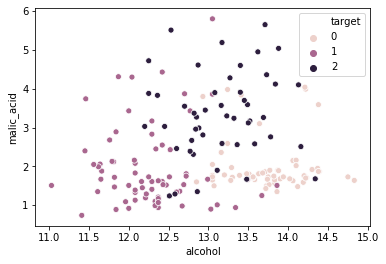

In [8]:
ax = sns.scatterplot(x="alcohol", y="malic_acid", data=data_al_mal, hue=labels)

## 3) Split train_val_test

In [9]:
# scaler = StandardScaler()

# data_al_mal = scaler.fit_transform(data_al_mal)

X_train, X_test, y_train, y_test = train_test_split(data_al_mal, labels, test_size=0.3, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/7, random_state=0) #5:2:3

## 4) KNeighborsClassifier

### a) Apply K-Nearest Neighbors
### b) Plot the data and the decision boundaries
### c) Evaluate the method on the validation set

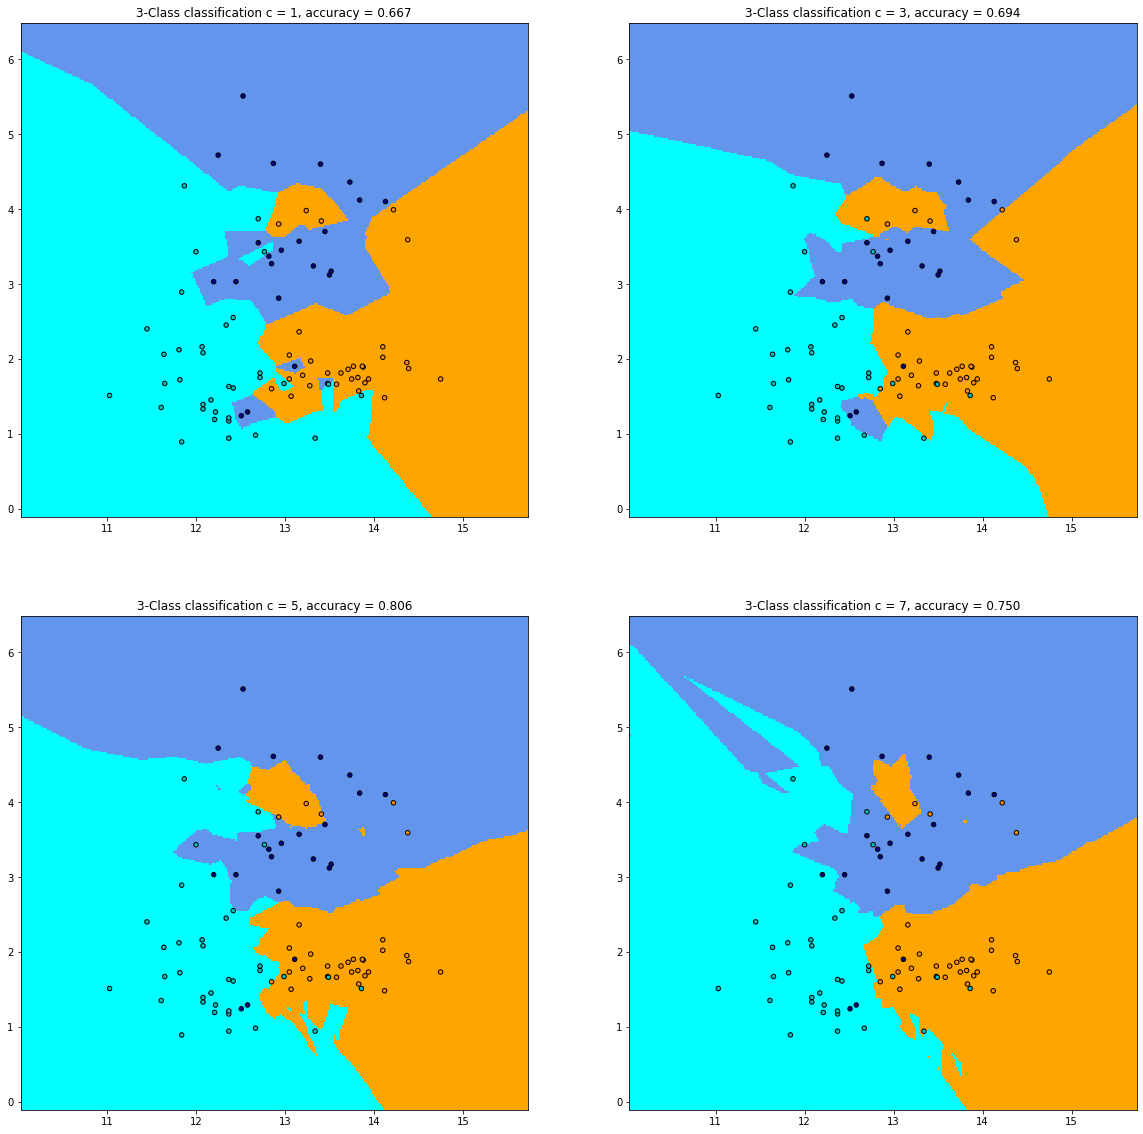

accuracy for each iteration: [0.66666667 0.69444444 0.80555556 0.75      ]
accuracy (statistics): 0.729 (+/- 0.107)


In [10]:
K = [1, 3, 5, 7]
scores = []

def do_KNeigh(X_train, X_val, y_train, y_val, K):
    
    # Set up the matplotlib figure
    figure, axes = plt.subplots(2, 2, figsize=(20, 20))
    
    flat_axes = [ax for subaxes in axes for ax in subaxes]

    for i, k in enumerate(K):
        
        clf_KNN = KNeighborsClassifier(n_neighbors=k)
        clf_KNN.fit(X_train, y_train)
        
        y_val_predict = clf_KNN.predict(X_val)
        scores.append(accuracy_score(y_val, y_val_predict))
        
        title = title = "3-Class classification c = %.f, accuracy = %.3f" % (k, round(scores[i], 3))
        
        plot_decision_boundaries(X_train.to_numpy(), y_train.to_numpy(), clf_KNN, figure, flat_axes[i], title)
    
    plt.show()


do_KNeigh(X_train, X_val, y_train, y_val, K)

# print(f"The scores are {scores}")
print_score(np.array(scores), "accuracy")

## 5) Plot a graph showing how the accuracy on the validation set varies when changing K

abbellire

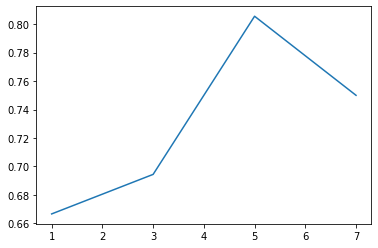

In [11]:
ax = sns.lineplot(x=K, y=scores)

## 6) How the boundaries change? Why?

## 7) evaluate the model on the test set

In [12]:
bestK = get_best_parameter(scores, K)

KNNs = [KNeighborsClassifier(n_neighbors=parameter) for parameter in bestK]

y_test_score = classify(KNNs, X_train, y_train, X_test, y_test)

y_test_score

Best parameters: [5]


0.7962962962962963

## 8) Support Vector Machines

### a) Train a linear SVM on the training set
### b) Plot the data and the decision boundaries
### c) Evaluate the method on the validation set

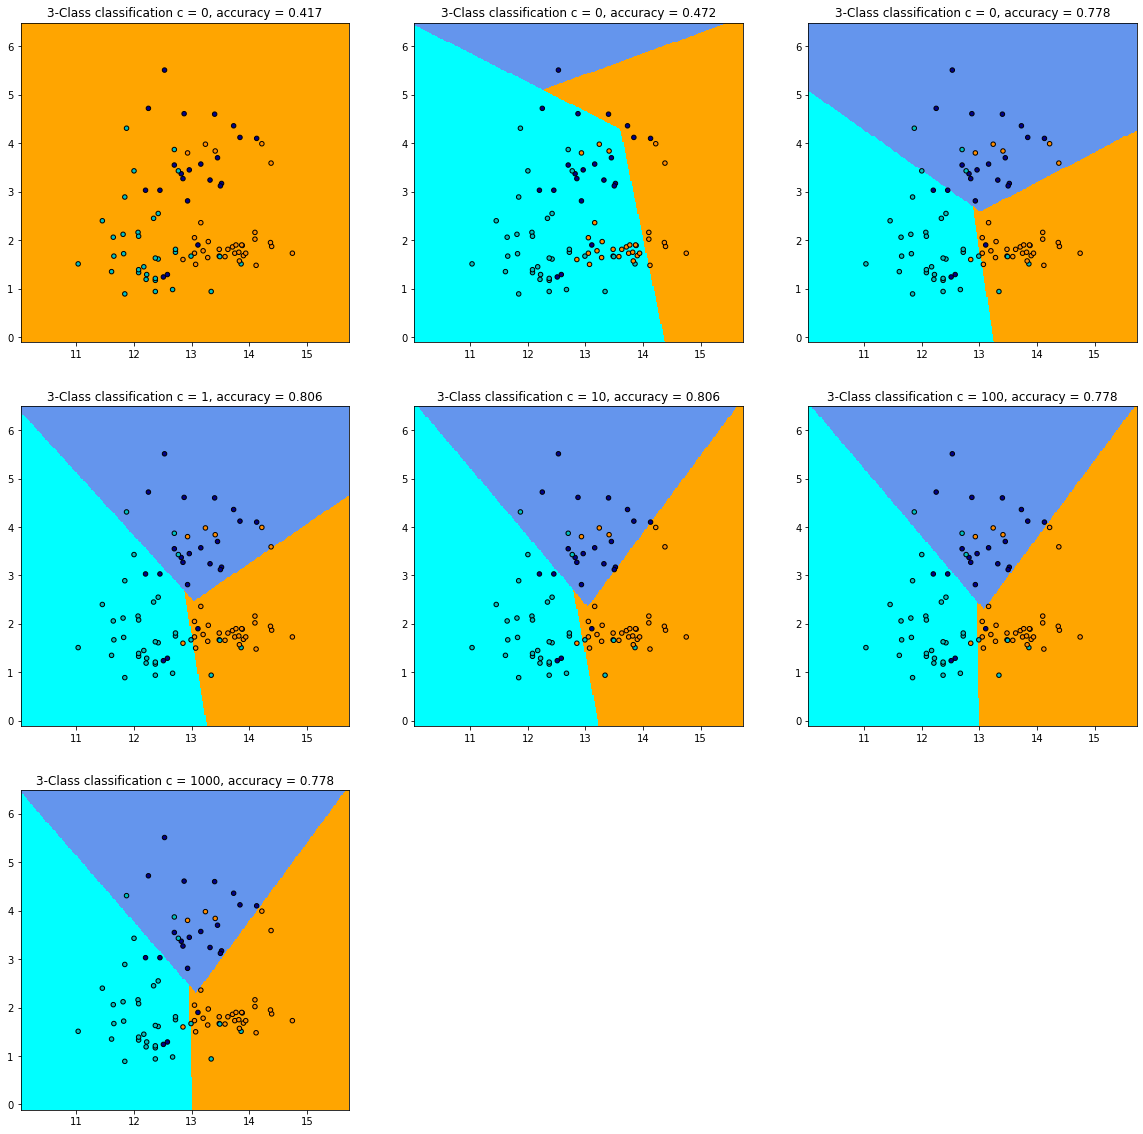

accuracy for each iteration: [0.41666667 0.47222222 0.77777778 0.80555556 0.80555556 0.77777778
 0.77777778]
accuracy (statistics): 0.690 (+/- 0.313)


In [13]:
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]

scores = []

def doSvc_linear(X_train, X_val, y_train, y_val, C):
    
    # Set up the matplotlib figure
    figure, axes = plt.subplots(3, 3, figsize=(20, 20))
    
    flat_axes = [ax for subaxes in axes for ax in subaxes]
    
    for i, c in enumerate(C):
        
        clf_SVC = SVC(random_state=0, C=c, kernel = 'linear')
        clf_SVC.fit(X_train, y_train)
        
        y_val_predict = clf_SVC.predict(X_val)
        scores.append(accuracy_score(y_val, y_val_predict))
        
        title = "3-Class classification c = %.f, accuracy = %.3f" % (c, round(scores[i], 3))
        
        plot_decision_boundaries(X_train.to_numpy(), y_train.to_numpy(), clf_SVC, figure, flat_axes[i], title)
    
    figure.delaxes(axes[2,1])
    figure.delaxes(axes[2,2])
    plt.show()
        
        
doSvc_linear(X_train, X_val, y_train, y_val, C)

# print(f"The scores are {scores}")
print_score(np.array(scores), "accuracy")

## 9) Plot a graph showing how the accuracy on the validation set varies when changing C

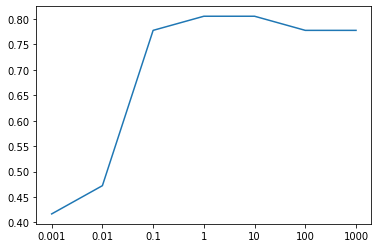

In [14]:
ax = sns.lineplot(x=list(str(c) for c in C), y=scores)

## 10) How the boundaries change? Why?

## 11) Use the best value of C and evaluate the model on the test set.

In [15]:
bestC = get_best_parameter(scores, C)

# bestC = 1

clf_SVCs = [SVC(random_state=0, C=parameter, kernel = 'linear') for parameter in bestC]

classify(clf_SVCs,  X_train, y_train, X_test, y_test)

Best parameters: [1, 10]


0.8148148148148148

## 12) Kernel SVM (RBF)

### Repeat point 8) (train, plot, etc..), but this time use an RBF kernel

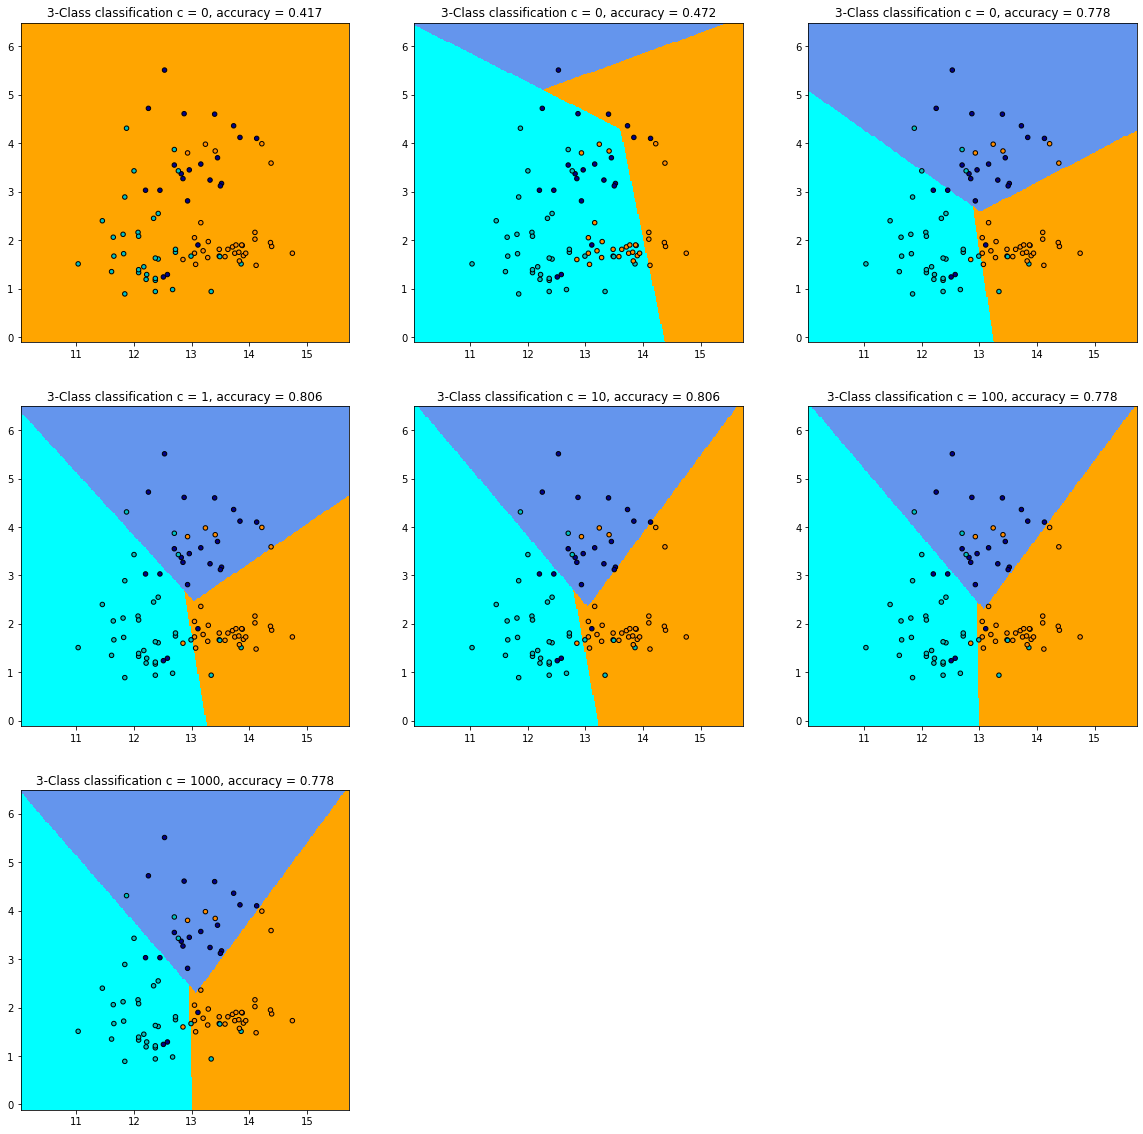

The scores are [0.4166666666666667, 0.4722222222222222, 0.7777777777777778, 0.8055555555555556, 0.8055555555555556, 0.7777777777777778, 0.7777777777777778]


In [16]:
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]

scores = []

def doSvc_RBF(X_train, X_val, y_train, y_val, C):
    
    # Set up the matplotlib figure
    figure, axes = plt.subplots(3, 3, figsize=(20, 20))
    
    flat_axes = [ax for subaxes in axes for ax in subaxes]
    
    for i, c in enumerate(C):
        
        clf_SVC_RBF = SVC(random_state=0, C=c, kernel = 'rbf')
        clf_SVC_RBF.fit(X_train, y_train)
        
        y_val_predict = clf_SVC_RBF.predict(X_val)
        scores.append(accuracy_score(y_val, y_val_predict))
        
        title = "3-Class classification c = %.f, accuracy = %.3f" % (c, round(scores[i], 3))
        
        plot_decision_boundaries(X_train, y_train.to_numpy(), clf_SVC_RBF, figure, flat_axes[i], title)

    plt.show()
        
        
doSvc_linear(X_train, X_val, y_train, y_val, C)

print(f"The scores are {scores}")

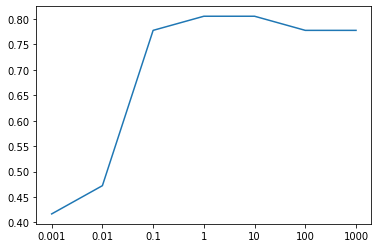

In [17]:
ax = sns.lineplot(x=list(str(c) for c in C), y=scores)

## 13) Evaluate the best C on the test set

In [18]:
bestC = get_best_parameter(scores, C)

clf_SVC_RBFs = [SVC(random_state=0, C=index, kernel = 'rbf') for index in bestC]

classify(clf_SVC_RBFs,  X_train, y_train, X_test, y_test)

Best parameters: [1, 10]


0.8333333333333334

## 14) Are there any differences compared to the linear kernel? How are the boundaries different?

## 15) Perform a grid search of the best parameters for an RBF kernel

In [19]:
SVM_model = SVC(random_state=0, kernel='rbf')

param_grid = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gridSearch = GridSearchCV(SVM_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gridSearch.fit(X_train, y_train)

print(gridSearch.best_params_)

{'C': 10, 'gamma': 0.01}


In [20]:
clf_SVC_RBF = SVC(random_state=0, kernel='rbf', **gridSearch.best_params_)
clf_SVC_RBF.fit(X_train, y_train)
        
y_val_predict = clf_SVC_RBF.predict(X_val)
score = accuracy_score(y_val, y_val_predict)

print(f"Accuracy on the validation set = {score}")

y_val_predict = clf_SVC_RBF.predict(X_test)
score = accuracy_score(y_test, y_val_predict)

print(f"Accuracy on the test set = {score}")


Accuracy on the validation set = 0.7777777777777778
Accuracy on the test set = 0.8333333333333334


# TO-DO: plot decision boundaries and do gridseach without crossvalidation

## K-fold

## 16) Merge the training and validation split

In [21]:
X_Train_val = pd.concat([X_train, X_val])
y_Train_val = pd.concat([y_train, y_val])


## 17) Grid search for gamma and C with 5-fold validation

In [22]:
SVM_model = SVC(random_state=0, kernel='rbf')

param_grid = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gridSearch = GridSearchCV(SVM_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gridSearch.fit(X_Train_val, y_Train_val)

print(gridSearch.best_params_)

{'C': 10, 'gamma': 0.01}


## 18) Evaluate the parameters on the test set

In [23]:
clf_SVC_RBF = SVC(random_state=0, kernel='rbf', **gridSearch.best_params_)
clf_SVC_RBF.fit(X_Train_val, y_Train_val)

score = accuracy_score(y_test, y_val_predict)
print(f"Accuracy on the test set = {score}")


Accuracy on the test set = 0.8333333333333334
